Slope:  [-88303.18915238]
Intercept:  181208083.10732976


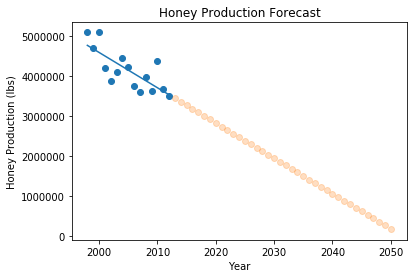

In [53]:
# This project uses sci-kit learn to fit a linear regression on data, and uses the model to
# predict future outcomes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# import honey bee production data
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

# mean honey production per year in lbs
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

x = prod_per_year['year']
y = prod_per_year['totalprod']

# plot mean honey production per year
# plots training data in blue
plt.scatter(x,y)

# create a linear regression model, and train it on the data
# we only have one feature so sklearn wants us to reshape the data
x = x.values.reshape(-1,1)
honey_fit = linear_model.LinearRegression()
honey_fit.fit(x,y)

# obtain the coefficients of the linear model
[slope, intercept] = honey_fit.coef_, honey_fit.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

# plot the linear model as a function of the independent axis
model = honey_fit.predict(x)
plt.plot(x, model)
plt.xlabel("Year")
plt.ylabel("Honey Production (lbs)")
plt.title("Honey Production Forecast")

# predict honey in the future
# creates an array of future years we can feed our model so it can predict future
# honey production, in orange
x_future = np.array(range(2013, 2051))
x_future = x_future.reshape(-1, 1)
future_honey = honey_fit.predict(x_future)

plt.scatter(x_future, future_honey, alpha=0.25)
plt.show()